In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import svm
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import VarianceThreshold
from sklearn.linear_model import Perceptron
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier
from xgboost import XGBClassifier

In [3]:
from qns3vm.qns3vm.qns3vm import *
import warnings

warnings.simplefilter('error')
warnings.filterwarnings('ignore', category=PendingDeprecationWarning) 
warnings.filterwarnings("ignore", category=DeprecationWarning, message=".*scipy.sparse.csc.*") 

In [4]:
red_wine_path = 'C:/Users/aarya/Desktop/USC University/EE599 - ML2b/Project/wine+quality/winequality-red.csv'
white_wine_path = 'C:/Users/aarya/Desktop/USC University/EE599 - ML2b/Project/wine+quality/winequality-white.csv'

In [5]:
# Load data
red_wine_data = pd.read_csv(red_wine_path, sep=';')
white_wine_data = pd.read_csv(white_wine_path, sep=';')

# Add a column for wine type 
# Red wine as 0, White wine as 1
red_wine_data['type'] = 0
white_wine_data['type'] = 1

# Combine the Dataset
wine_data_org = pd.concat([red_wine_data, white_wine_data], axis=0).reset_index(drop=True)

In [6]:
wine_data_org.shape

(6497, 13)

# Data Preprocessing

### Removing Duplicates

In [7]:
# Check for duplicates
num_duplicates = wine_data_org.duplicated().sum()
print(f"Number of duplicate data points: {num_duplicates}")

# Remove duplicates (if any) and keep the first occurrence
wine_data = wine_data_org.drop_duplicates(keep='first')

# Reset the index after removing duplicates
wine_data = wine_data.reset_index(drop=True)

print(f"Shape of original dataset: {wine_data_org.shape}")
print(f"Shape of dataset after removing duplicates: {wine_data.shape}")

Number of duplicate data points: 1177
Shape of original dataset: (6497, 13)
Shape of dataset after removing duplicates: (5320, 13)


In [8]:
# Separate features and target
X = wine_data.drop(columns=['quality'])
y = wine_data['quality']

In [9]:
print(unique(y))

[3 4 5 6 7 8 9]


In [10]:
class_distribution_before = pd.Series(y).value_counts().reindex(range(0, 11), fill_value=0)
print("Class distribution after removing duplicates:\n", class_distribution_before)

print("\nDataset shape:", X.shape)

Class distribution after removing duplicates:
 quality
0        0
1        0
2        0
3       30
4      206
5     1752
6     2323
7      856
8      148
9        5
10       0
Name: count, dtype: int64

Dataset shape: (5320, 12)


### Reassign Class Labels into High Medium and Low

In [11]:
# Converting into low medium high
y = np.where(y < 5, 0, np.where((y == 5) | (y == 6), 1, 2))

In [12]:
print(unique(y))

[0 1 2]


In [13]:
class_distribution_before = pd.Series(y).value_counts().reindex(range(0, 3), fill_value=0)
print("Class distribution before Preprcoessing:\n", class_distribution_before)

print("\nDataset shape:", X.shape)

Class distribution before Preprcoessing:
 0     236
1    4075
2    1009
Name: count, dtype: int64

Dataset shape: (5320, 12)


### Normalize the data

In [14]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

### Train Val Test Split

In [15]:
# Split data into training, validation, and test sets
# 80% for training, 20% for test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [16]:
# Print dataset shapes
print("Training set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Training set shape: (4256, 12) (4256,)
Test set shape: (1064, 12) (1064,)


In [17]:
class_distribution_before = pd.Series(y_train).value_counts().reindex(range(0, 3), fill_value=0)
print("Class distribution of Training Set:\n", class_distribution_before)

print("\nTraining set shape:", X_train.shape, y_train.shape)

Class distribution of Training Set:
 0     188
1    3271
2     797
Name: count, dtype: int64

Training set shape: (4256, 12) (4256,)


### Rebalancing the Class distributions

#### Undersampling

In [18]:
# Randomly undersampling the majority class to 1000. Chosen by heuristic reasoning
undersampler = RandomUnderSampler(sampling_strategy={1: 1000})
X_train, y_train = undersampler.fit_resample(X_train, y_train)

In [19]:
class_distribution_before = pd.Series(y_train).value_counts().reindex(range(0, 3), fill_value=0)
print("Class distribution of Training Set after undersampling Majority class 0:\n", class_distribution_before)

print("\nTraining set shape:", X_train.shape, y_train.shape)

Class distribution of Training Set after undersampling Majority class 0:
 0     188
1    1000
2     797
Name: count, dtype: int64

Training set shape: (1985, 12) (1985,)


#### SMOTE

In [20]:
# Apply SMOTE to the training set
smote = SMOTE(k_neighbors=3)
X_train, y_train = smote.fit_resample(X_train, y_train)

print("Training set shape:", X_train.shape, y_train.shape)

Training set shape: (3000, 12) (3000,)


In [21]:
class_distribution_before = pd.Series(y_train).value_counts().reindex(range(0, 3), fill_value=0)
print("Class distribution of Training Set after SMOTE:\n", class_distribution_before)

print("\nTraining set shape:", X_train.shape, y_train.shape)

Class distribution of Training Set after SMOTE:
 0    1000
1    1000
2    1000
Name: count, dtype: int64

Training set shape: (3000, 12) (3000,)


### Feature Selection

Correlation Analysis

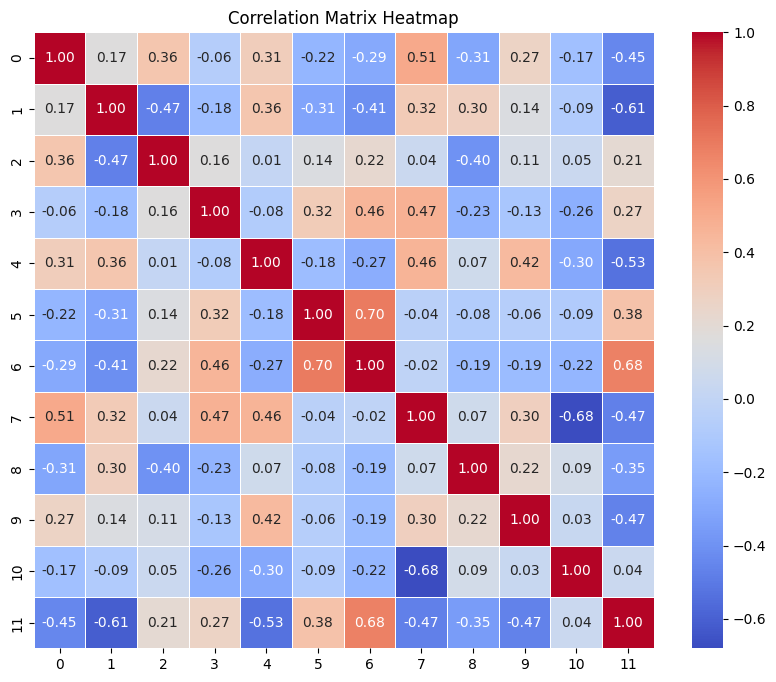

In [22]:
# Calculate the correlation matrix
corr_matrix = np.corrcoef(X_train, rowvar=False)

# Plot the heatmap of the correlation matrix using seaborn (requires 2D array)
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [23]:
# Find pairs of features with correlation greater than 0.8 (absolute value)
to_drop = set()  # Use set to avoid duplicates

num_features = X_train.shape[1]

for i in range(num_features):
    # Get the correlations of feature i with all other features
    high_corr_indices = np.where(np.abs(corr_matrix[i]) > 0.8)[0]
    
    # Add all high correlations to the set to be dropped, except for the feature itself
    for j in high_corr_indices:
        if i != j:  # Avoid adding the feature itself
            to_drop.add(j)

# Drop the highly correlated features by their indices from X_train
X_train = np.delete(X_train, list(to_drop), axis=1)

# Print the dropped features and the reduced dataset shape
print(f"Dropped feature indices: {to_drop}")
print(f"Reduced dataset shape: {X_train.shape}")


Dropped feature indices: set()
Reduced dataset shape: (3000, 12)


Variance Thresholding

In [24]:
# Set a threshold (e.g., 0.1) to remove low-variance features
selector = VarianceThreshold(threshold=0.1)
X_train = selector.fit_transform(X_train)

print("Training set shape:", X_train.shape)

Training set shape: (3000, 12)


In [25]:
class_distribution_after = pd.Series(y_train).value_counts().reindex(range(0, 3), fill_value=0)
print("\nClass distribution after all Data Preprocessing:\n", class_distribution_after)

print("\nTraining set shape:", X_train.shape)


Class distribution after all Data Preprocessing:
 0    1000
1    1000
2    1000
Name: count, dtype: int64

Training set shape: (3000, 12)


# Overall Baseline Models

## TRIVIAL : Random Class Assignment

In [26]:
"""Predicts wine quality randomly based on training data distribution."""

def random_guessing_baseline(X_train, y_train):

  unique_classes, class_counts = np.unique(y_train, return_counts=True)
  class_probabilities = class_counts / len(y_train)
  num_samples = X_train.shape[0]

  y_pred = np.random.choice(unique_classes, size=num_samples, p=class_probabilities)

  return y_pred

In [27]:
print("\nRandom Guessing Baseline")
y_pred_random = random_guessing_baseline(X_test, y_train)

# Predictions on the test set
y_pred_random_test = random_guessing_baseline(X_test, y_train)
accuracy_random_test = accuracy_score(y_test, y_pred_random_test)
f1_random_test = f1_score(y_test, y_pred_random_test, average='weighted')
conf_matrix_random = confusion_matrix(y_test, y_pred_random)

# Predictions on the training set
y_pred_random_train = random_guessing_baseline(X_train, y_train)
accuracy_random_train = accuracy_score(y_train, y_pred_random_train)
f1_random_train = f1_score(y_train, y_pred_random_train, average='weighted')


# Print Results
print("Training Set - Accuracy:", accuracy_random_train)
print("Training Set - F1 Score:", f1_random_train)
print("Test Set - Accuracy:", accuracy_random_test)
print("Test Set - F1 Score:", f1_random_test)


Random Guessing Baseline
Training Set - Accuracy: 0.3343333333333333
Training Set - F1 Score: 0.3343198468908987
Test Set - Accuracy: 0.3223684210526316
Test Set - F1 Score: 0.39251660622433704



## NON TRIVIAL: Logistic Regression

In [28]:
print("\nLogistic Regression Baseline")
logistic_model = LogisticRegression(max_iter=1000, random_state=1)
logistic_model.fit(X_train, y_train)
y_pred_train = logistic_model.predict(X_train)
y_pred_logistic = logistic_model.predict(X_test)

# Evaluation
accuracy_logistic_train = accuracy_score(y_train, y_pred_train)
f1_logistic_train = f1_score(y_train, y_pred_train, average='weighted')
conf_matrix_logistic_train = confusion_matrix(y_train, y_pred_train)

print("\nTraining Metrics")
print("Accuracy:", accuracy_logistic_train)
print("F1 Score:", f1_logistic_train)


# Evaluation
accuracy_logistic_test = accuracy_score(y_test, y_pred_logistic)
f1_logistic_test = f1_score(y_test, y_pred_logistic, average='weighted')
conf_matrix_logistic_test = confusion_matrix(y_test, y_pred_logistic)

print("\nTest Metrics")
print("Accuracy:", accuracy_logistic_test)
print("F1 Score:", f1_logistic_test)



Logistic Regression Baseline

Training Metrics
Accuracy: 0.6616666666666666
F1 Score: 0.6568400187909835

Test Metrics
Accuracy: 0.5582706766917294
F1 Score: 0.6020324444418317


## NON TRIVIAL: Linear Perceptron OvO OvR

In [29]:
# One-vs-One (OvO)
ovo_classifier = OneVsOneClassifier(Perceptron(random_state=1))
# Train OvO
ovo_classifier.fit(X_train, y_train)
# Predictions using OvO
y_pred_ovo_train = ovo_classifier.predict(X_train)
y_pred_ovo_test = ovo_classifier.predict(X_test)
# Evaluate OvO
accuracy_ovo_train = accuracy_score(y_train, y_pred_ovo_train)
f1_ovo_train = f1_score(y_train, y_pred_ovo_train, average='weighted')
accuracy_ovo_test = accuracy_score(y_test, y_pred_ovo_test)
f1_ovo_test = f1_score(y_test, y_pred_ovo_test, average='weighted')

# One-vs-Rest (OvR)
ovr_classifier = OneVsRestClassifier(Perceptron(random_state=1))
# Train OvR
ovr_classifier.fit(X_train, y_train)
# Predictions using OvR
y_pred_ovr_train = ovr_classifier.predict(X_train)
y_pred_ovr_test = ovr_classifier.predict(X_test)
# Evaluate OvR
accuracy_ovr_train = accuracy_score(y_train, y_pred_ovr_train)
f1_ovr_train = f1_score(y_train, y_pred_ovr_train, average='weighted')
accuracy_ovr_test = accuracy_score(y_test, y_pred_ovr_test)
f1_ovr_test = f1_score(y_test, y_pred_ovr_test, average='weighted')

In [30]:
print("\nOne-vs-One (OvO) Linear Perceptron")
print("Training Accuracy:", accuracy_ovo_train)
print("Training F1 Score:", f1_ovo_train)
print("Test Accuracy:", accuracy_ovo_test)
print("Test F1 Score:", f1_ovo_test)

print("\nOne-vs-Rest (OvR) Linear Perceptron")
print("Training Accuracy:", accuracy_ovr_train)
print("Training F1 Score:", f1_ovr_train)
print("Test Accuracy:", accuracy_ovr_test)
print("Test F1 Score:", f1_ovr_test)


One-vs-One (OvO) Linear Perceptron
Training Accuracy: 0.5203333333333333
Training F1 Score: 0.5166177384972628
Test Accuracy: 0.4642857142857143
Test F1 Score: 0.5192357318183002

One-vs-Rest (OvR) Linear Perceptron
Training Accuracy: 0.5576666666666666
Training F1 Score: 0.5487974789926634
Test Accuracy: 0.46616541353383456
Test F1 Score: 0.5129018709533545


# Supervised Learning Methods

## CART - Decision Tree

In [31]:

print("\nDecision Tree (CART)")
cart_model = DecisionTreeClassifier(random_state=42)
cart_model.fit(X_train, y_train)
y_pred_cart_train = cart_model.predict(X_train)
y_pred_cart_test = cart_model.predict(X_test)


# Evaluation
accuracy_cart_train = accuracy_score(y_train, y_pred_cart_train)
f1_cart_train = f1_score(y_train, y_pred_cart_train, average='weighted')
conf_matrix_cart_train = confusion_matrix(y_train, y_pred_cart_train)

print("Train Accuracy:", accuracy_cart_train)
print("Train F1 Score:", f1_cart_train)
# Evaluation
accuracy_cart_test = accuracy_score(y_test, y_pred_cart_test)
f1_cart_test = f1_score(y_test, y_pred_cart_test, average='weighted')
conf_matrix_cart_test = confusion_matrix(y_test, y_pred_cart_test)

print("Test Accuracy:", accuracy_cart_test)
print("Test F1 Score:", f1_cart_test)


Decision Tree (CART)
Train Accuracy: 1.0
Train F1 Score: 1.0
Test Accuracy: 0.6005639097744361
Test F1 Score: 0.6387553597583969


### AdaBoost

In [32]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

print("\nCART with AdaBoost")

adaboost_model = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(random_state=42),
    n_estimators=50,  # Number of weak learners
    algorithm='SAMME',
    random_state=42
)

# Fit the AdaBoost model
adaboost_model.fit(X_train, y_train)

# Predictions
y_pred_adaboost_train = adaboost_model.predict(X_train)
y_pred_adaboost_test = adaboost_model.predict(X_test)

# Evaluation
accuracy_adaboost_train = accuracy_score(y_train, y_pred_adaboost_train)
f1_adaboost_train = f1_score(y_train, y_pred_adaboost_train, average='weighted')
accuracy_adaboost_test = accuracy_score(y_test, y_pred_adaboost_test)
f1_adaboost_test = f1_score(y_test, y_pred_adaboost_test, average='weighted')

print("Train Accuracy:", accuracy_adaboost_train)
print("Test Accuracy:", accuracy_adaboost_test)
print("Train F1 Score:", f1_adaboost_train)
print("Test F1 Score:", f1_adaboost_test)



CART with AdaBoost
Train Accuracy: 1.0
Test Accuracy: 0.5864661654135338
Train F1 Score: 1.0
Test F1 Score: 0.6250910395175698


### Grid Selection for the Best Hyperparameter in CART

In [33]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score

# Define parameter grid for CART
cart_param_grid = {
    'criterion': ['gini', 'entropy'],  # Criteria for split
    'max_depth': [None, 5, 10, 20],    # Depth of tree
    'min_samples_split': [2, 5, 10],   # Min samples required to split a node
    'min_samples_leaf': [1, 2, 5]      # Min samples required in a leaf node
}

# Initialize the CART model
cart_model = DecisionTreeClassifier(random_state=42)

# Perform grid search
cart_grid_search = GridSearchCV(
    estimator=cart_model,
    param_grid=cart_param_grid,
    scoring='f1_weighted'
)

# Fit to training data
cart_grid_search.fit(X_train, y_train)

# Best parameters and performance on testing
print("Best CART Parameters:", cart_grid_search.best_params_)
print("Best CART F1 Score:", cart_grid_search.best_score_)

# Evaluate the best model on the testing data
best_cart_model = cart_grid_search.best_estimator_
print("Best CART Model Configuration:", best_cart_model)
cart_test_predictions = best_cart_model.predict(X_test)
print("CART Test Accuracy:", accuracy_score(y_test, cart_test_predictions))
print("CART Test F1 Score:", f1_score(y_test, cart_test_predictions, average='weighted'))

Best CART Parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best CART F1 Score: 0.6974779183305755
Best CART Model Configuration: DecisionTreeClassifier(criterion='entropy', random_state=42)
CART Test Accuracy: 0.6118421052631579
CART Test F1 Score: 0.6472559711249237


## Random Forest

In [34]:
print("\nRandom Forest")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf_train = rf_model.predict(X_train)
y_pred_rf_test = rf_model.predict(X_test)

# Evaluation
accuracy_rf_train = accuracy_score(y_train, y_pred_rf_train)
f1_rf_train = f1_score(y_train, y_pred_rf_train, average='weighted')
conf_matrix_rf_train = confusion_matrix(y_train, y_pred_rf_train)

print("Accuracy:", accuracy_rf_train)
print("F1 Score:", f1_rf_train)

# Evaluation
accuracy_rf_test = accuracy_score(y_test, y_pred_rf_test)
f1_rf_test = f1_score(y_test, y_pred_rf_test, average='weighted')
conf_matrix_rf_test = confusion_matrix(y_test, y_pred_rf_test)

print("Accuracy:", accuracy_rf_test)
print("F1 Score:", f1_rf_test)


Random Forest
Accuracy: 1.0
F1 Score: 1.0
Accuracy: 0.668233082706767
F1 Score: 0.6928502235416286


### AdaBoost

In [35]:
from sklearn.ensemble import AdaBoostClassifier

print("\nAdaBoost")
adaboost_model = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1, random_state=42),
    n_estimators=50,  # Number of weak learners
    algorithm='SAMME',  # Use the SAMME algorithm instead of SAMME.R
    random_state=42
)

adaboost_model.fit(X_train, y_train)

# Predictions
y_pred_adaboost_train = adaboost_model.predict(X_train)
y_pred_adaboost_test = adaboost_model.predict(X_test)

# Evaluation - Training Data
accuracy_adaboost_train = accuracy_score(y_train, y_pred_adaboost_train)
f1_adaboost_train = f1_score(y_train, y_pred_adaboost_train, average='weighted')
conf_matrix_adaboost_train = confusion_matrix(y_train, y_pred_adaboost_train)

print("Train Accuracy:", accuracy_adaboost_train)
print("Train F1 Score:", f1_adaboost_train)

# Evaluation - Testing Data
accuracy_adaboost_test = accuracy_score(y_test, y_pred_adaboost_test)
f1_adaboost_test = f1_score(y_test, y_pred_adaboost_test, average='weighted')
conf_matrix_adaboost_test = confusion_matrix(y_test, y_pred_adaboost_test)

print("Test Accuracy:", accuracy_adaboost_test)
print("Test F1 Score:", f1_adaboost_test)



AdaBoost
Train Accuracy: 0.6676666666666666
Train F1 Score: 0.6681520419583948
Test Accuracy: 0.5808270676691729
Test F1 Score: 0.6246464599063019


### Grid Selection for the Best Hyperparameter in Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

# Define parameter grid for Random Forest
rf_param_grid = {
    'n_estimators': [50, 100, 200],              # Number of trees
    'max_depth': [None, 5, 10, 20],              # Depth of trees
    'min_samples_split': [2, 5, 10],             # Min samples to split a node
    'min_samples_leaf': [1, 2, 5],               # Min samples in leaf node
}

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Perform grid search
rf_grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=rf_param_grid,
    scoring='f1_weighted'
)

# Fit to training data
rf_grid_search.fit(X_train, y_train)

# Best parameters and performance
print("Best Random Forest Parameters:", rf_grid_search.best_params_)
print("Best Random Forest F1 Score (on validation):", rf_grid_search.best_score_)

# Evaluate the best model on the testing data
best_rf_model = rf_grid_search.best_estimator_
print("Best Random Forest Model Configuration:", best_rf_model)
rf_test_predictions = best_rf_model.predict(X_test)
print("Random Forest Test Accuracy:", accuracy_score(y_test, rf_test_predictions))
print("Random Forest Test F1 Score:", f1_score(y_test, rf_test_predictions, average='weighted'))


# Semi Supervised

In [37]:
# Percentage of unlabelled data (to remove labels)
proportions = [0.9, 0.6, 0.3, 0.1]

In [38]:
def select_random_samples(X, y, L, balanced=True):
    
    total_samples = len(y)
    mask_size = int(L * total_samples)

    if balanced:
        # Get indices for each class
        class_indices = [np.where(y == i)[0] for i in np.unique(y)]
        
        # Compute number of samples to select from each class
        mask_per_class = [int(L * len(indices)) for indices in class_indices]
        
        # Ensure at least one sample is selected from each class if possible
        mask_per_class = [max(1, m) for m in mask_per_class]

        # Randomly select indices for each class
        selected_indices = np.concatenate([
            np.random.choice(indices, size=min(m, len(indices)), replace=False)
            for indices, m in zip(class_indices, mask_per_class)
        ])
    else:
        # Select mask_size indices randomly across all samples
        selected_indices = np.random.choice(np.arange(total_samples), size=mask_size, replace=False)

    # Create masks for selected and remaining samples
    mask = np.ones(total_samples, dtype=bool)
    mask[selected_indices] = False

    X_labeled = X[mask]
    y_labeled = y[mask]

    X_unlabeled = X[selected_indices]
    y_unlabeled = y[selected_indices]

    return X_labeled, y_labeled, X_unlabeled, y_unlabeled


### Baseline: SVM and Self Training: 1-NN

In [39]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

**************  BASELINE MODELS  **************
************** FOR BALANCED DATA **************

*****  90.0 % of data is unlablled *****
SVM
Train  --> Accuracy: 0.6667, F1 Score: 0.6586
Test   --> Accuracy: 0.5047, F1 Score: 0.5538
1NN
Train  --> Accuracy: 1.0000, F1 Score: 1.0000
Test   --> Accuracy: 0.4972, F1 Score: 0.5445

*****  60.0 % of data is unlablled *****
SVM
Train  --> Accuracy: 0.6767, F1 Score: 0.6691
Test   --> Accuracy: 0.5573, F1 Score: 0.5984
1NN
Train  --> Accuracy: 1.0000, F1 Score: 1.0000
Test   --> Accuracy: 0.5432, F1 Score: 0.5868

*****  30.0 % of data is unlablled *****
SVM
Train  --> Accuracy: 0.6786, F1 Score: 0.6714
Test   --> Accuracy: 0.5545, F1 Score: 0.5970
1NN
Train  --> Accuracy: 1.0000, F1 Score: 1.0000
Test   --> Accuracy: 0.5959, F1 Score: 0.6335

*****  10.0 % of data is unlablled *****
SVM
Train  --> Accuracy: 0.6785, F1 Score: 0.6743
Test   --> Accuracy: 0.5677, F1 Score: 0.6095
1NN
Train  --> Accuracy: 1.0000, F1 Score: 1.0000
Test   --> Acc

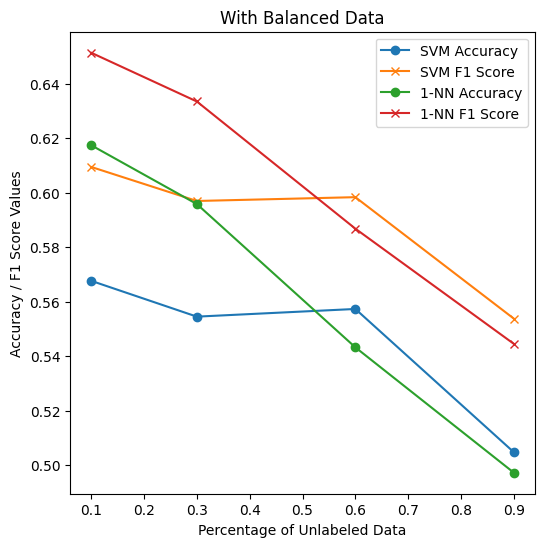

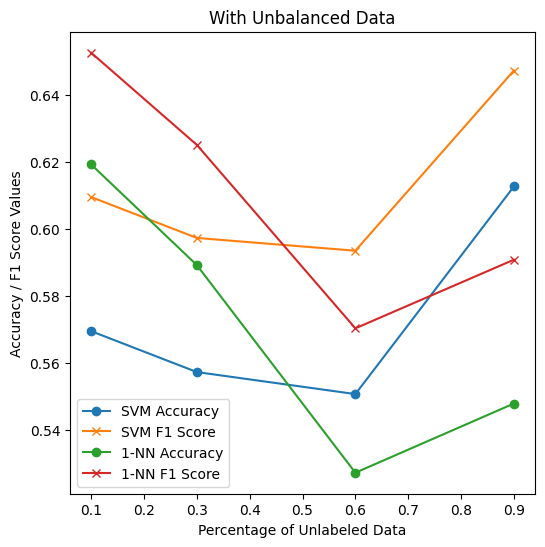

In [40]:
accuracies_svm = []
f1_scores_svm = []
accuracies_1nn = []
f1_scores_1nn = []

print("**************  BASELINE MODELS  **************")
print("************** FOR BALANCED DATA **************")

for prop in proportions:
    
    print("\n***** ",prop*100, "% of data is unlablled *****")

    X_train_labeled, y_train_labeled, X_train_unlabeled, y_train_unlabeled = select_random_samples(X_train, y_train, prop, balanced=True)

    # Supervised SVM Classifier Baseline
    model = svm.SVC(kernel='linear')
    model.fit(X_train_labeled, y_train_labeled.ravel())
    y_pred_train = model.predict(X_train_labeled)
    acc_svm_train = accuracy_score(y_train_labeled, y_pred_train)
    f1_svm_train = f1_score(y_train_labeled, y_pred_train, average='weighted')

    y_pred = model.predict(X_test)
    acc_svm = accuracy_score(y_test, y_pred)
    f1_svm = f1_score(y_test, y_pred, average='weighted')
    
    # print("Accuracy using SVM = ", acc_svm)
    # print("Accuracy using SVM = ", acc_svm)
    print("SVM")
    print(f"Train  --> Accuracy: {acc_svm_train:.4f}, F1 Score: {f1_svm_train:.4f}")
    print(f"Test   --> Accuracy: {acc_svm:.4f}, F1 Score: {f1_svm:.4f}")

    # Store results
    accuracies_svm.append(acc_svm)
    f1_scores_svm.append(f1_svm)

    # Supervised 1-NN Classifier Baseline
    model = KNeighborsClassifier(n_neighbors=1)
    model.fit(X_train_labeled, y_train_labeled.ravel())
    y_pred_train = model.predict(X_train_labeled)
    acc_1nn_train = accuracy_score(y_train_labeled, y_pred_train)
    f1_1nn_train = f1_score(y_train_labeled, y_pred_train, average='weighted')

    y_pred = model.predict(X_test)
    acc_1nn = accuracy_score(y_test, y_pred)
    f1_1nn = f1_score(y_test, y_pred, average='weighted')
    
    # print("Accuracy using 1nn = ", acc_1nn)
    # print("Accuracy using 1nn = ", acc_1nn)
    print("1NN")
    print(f"Train  --> Accuracy: {acc_1nn_train:.4f}, F1 Score: {f1_1nn_train:.4f}")
    print(f"Test   --> Accuracy: {acc_1nn:.4f}, F1 Score: {f1_1nn:.4f}")

    # Store results
    accuracies_1nn.append(acc_1nn)
    f1_scores_1nn.append(f1_1nn)

# Plotting the results
plt.figure(figsize=(6, 6))
plt.plot(proportions, accuracies_svm, label='SVM Accuracy', marker='o')
plt.plot(proportions, f1_scores_svm, label='SVM F1 Score', marker='x')
plt.plot(proportions, accuracies_1nn, label='1-NN Accuracy', marker='o')
plt.plot(proportions, f1_scores_1nn, label='1-NN F1 Score', marker='x')
plt.title('With Balanced Data')
plt.xlabel('Percentage of Unlabeled Data')
plt.ylabel('Accuracy / F1 Score Values')
plt.legend()




accuracies_svm = []
f1_scores_svm = []
accuracies_1nn = []
f1_scores_1nn = []

print("\n\n")
print("**************   BASELINE MODELS   **************")
print("************** FOR UNBALANCED DATA **************")

for prop in proportions:
    
    print("\n***** ",prop*100, "% of data is unlablled *****")

    X_train_labeled, y_train_labeled, X_train_unlabeled, y_train_unlabeled = select_random_samples(X_train, y_train, prop, balanced=False)

    # Supervised SVM Classifier Baseline
    model = svm.SVC(kernel='linear')
    model.fit(X_train_labeled, y_train_labeled.ravel())
    y_pred_train = model.predict(X_train_labeled)
    acc_svm_train = accuracy_score(y_train_labeled, y_pred_train)
    f1_svm_train = f1_score(y_train_labeled, y_pred_train, average='weighted')

    y_pred = model.predict(X_test)
    acc_svm = accuracy_score(y_test, y_pred)
    f1_svm = f1_score(y_test, y_pred, average='weighted')
    
    # print("Accuracy using SVM = ", acc_svm)
    # print("Accuracy using SVM = ", acc_svm)
    print("SVM")
    print(f"Train  --> Accuracy: {acc_svm_train:.4f}, F1 Score: {f1_svm_train:.4f}")
    print(f"Test   --> Accuracy: {acc_svm:.4f}, F1 Score: {f1_svm:.4f}")

    # Store results
    accuracies_svm.append(acc_svm)
    f1_scores_svm.append(f1_svm)

    # Supervised 1-NN Classifier Baseline
    model = KNeighborsClassifier(n_neighbors=1)
    model.fit(X_train_labeled, y_train_labeled.ravel())
    y_pred_train = model.predict(X_train_labeled)
    acc_1nn_train = accuracy_score(y_train_labeled, y_pred_train)
    f1_1nn_train = f1_score(y_train_labeled, y_pred_train, average='weighted')

    y_pred = model.predict(X_test)
    acc_1nn = accuracy_score(y_test, y_pred)
    f1_1nn = f1_score(y_test, y_pred, average='weighted')
    
    # print("Accuracy using 1nn = ", acc_1nn)
    # print("Accuracy using 1nn = ", acc_1nn)
    print("1NN")
    print(f"Train  --> Accuracy: {acc_1nn_train:.4f}, F1 Score: {f1_1nn_train:.4f}")
    print(f"Test   --> Accuracy: {acc_1nn:.4f}, F1 Score: {f1_1nn:.4f}")

    # Store results
    accuracies_1nn.append(acc_1nn)
    f1_scores_1nn.append(f1_1nn)


# Plotting the results
plt.figure(figsize=(6, 6))
plt.plot(proportions, accuracies_svm, label='SVM Accuracy', marker='o')
plt.plot(proportions, f1_scores_svm, label='SVM F1 Score', marker='x')
plt.plot(proportions, accuracies_1nn, label='1-NN Accuracy', marker='o')
plt.plot(proportions, f1_scores_1nn, label='1-NN F1 Score', marker='x')
plt.title('With Unbalanced Data')
plt.xlabel('Percentage of Unlabeled Data')
plt.ylabel('Accuracy / F1 Score Values')
plt.legend()


# Self Training with Random Forest

In [41]:
def self_training(X_labeled, y_labeled, X_unlabeled, X_test, y_test, model, confidence_threshold=0.9, max_iterations=10):

    for iteration in range(max_iterations):
        
        # Step 1: Train the model on the labeled dataset
        model.fit(X_labeled, y_labeled)

        # Step 2: Predict probabilities for the unlabeled dataset
        probabilities = model.predict_proba(X_unlabeled)
        max_probs = np.max(probabilities, axis=1)  # Get maximum confidence scores
        predictions = model.predict(X_unlabeled)  # Predicted labels for unlabeled data

        # Step 3: Select high-confidence samples
        high_confidence_mask = max_probs >= confidence_threshold
        if not np.any(high_confidence_mask):  # Break if no high-confidence samples remain
            # print(f"No high-confidence samples to label in iteration {iteration + 1}. Stopping self-training.")
            break

        # Step 4: Add high-confidence samples to the labeled set
        X_labeled = np.vstack([X_labeled, X_unlabeled[high_confidence_mask]])
        y_labeled = np.hstack([y_labeled, predictions[high_confidence_mask]])

        # Step 5: Remove high-confidence samples from the unlabeled set
        X_unlabeled = X_unlabeled[~high_confidence_mask]

        # print(f"Iteration {iteration + 1}: Added {np.sum(high_confidence_mask)} samples to labeled set. Remaining unlabeled samples: {len(X_unlabeled)}")

    # Final evaluation
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    train_accuracy = accuracy_score(y_train, y_pred_train)
    train_f1 = f1_score(y_train, y_pred_train, average='weighted')

    test_accuracy = accuracy_score(y_test, y_pred_test)
    test_f1 = f1_score(y_test, y_pred_test, average='weighted')

    print(f"Train  --> Accuracy: {train_accuracy:.4f}, F1 Score: {train_f1:.4f}")
    print(f"Test   --> Accuracy: {test_accuracy:.4f}, F1 Score: {test_f1:.4f}")

    return train_accuracy, train_f1, test_accuracy, test_f1

************** SELF-TRAINING MODEL **************
**************  FOR BALANCED DATA  **************

*****  90.0 % of data is unlabled *****
Train  --> Accuracy: 0.7060, F1 Score: 0.7032
Test   --> Accuracy: 0.5564, F1 Score: 0.6021

*****  60.0 % of data is unlabled *****
Train  --> Accuracy: 0.8533, F1 Score: 0.8512
Test   --> Accuracy: 0.6165, F1 Score: 0.6508

*****  30.0 % of data is unlabled *****
Train  --> Accuracy: 0.9440, F1 Score: 0.9437
Test   --> Accuracy: 0.6466, F1 Score: 0.6764

*****  10.0 % of data is unlabled *****
Train  --> Accuracy: 0.9807, F1 Score: 0.9806
Test   --> Accuracy: 0.6588, F1 Score: 0.6850


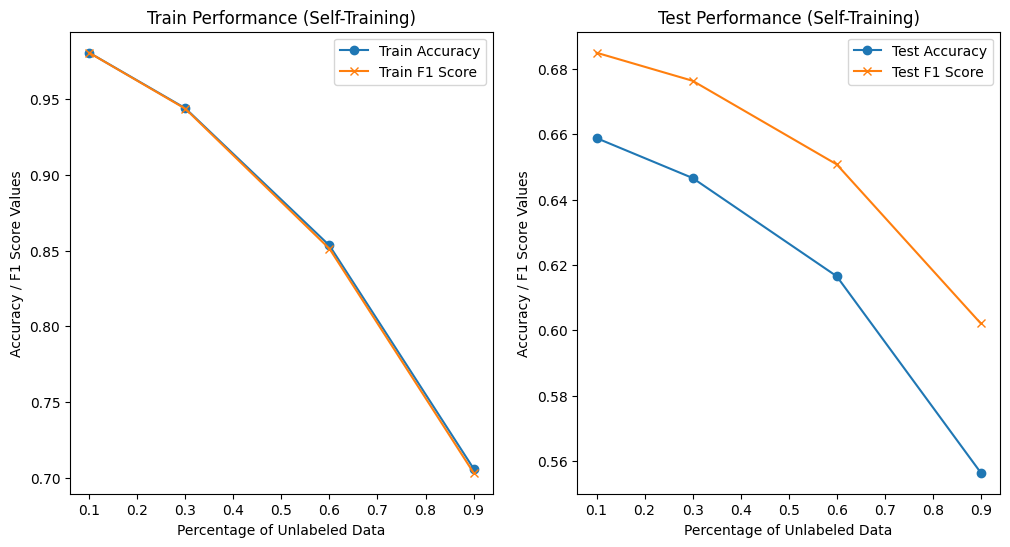

In [42]:
print("************** SELF-TRAINING MODEL **************")
print("**************  FOR BALANCED DATA  **************")

accuracies_train = []
f1_scores_train = []
accuracies_test = []
f1_scores_test = []

for prop in proportions:

    print("\n***** ",prop*100, "% of data is unlabled *****")

    X_train_labeled, y_train_labeled, X_train_unlabeled, y_train_unlabeled = select_random_samples(X_train, y_train, prop, balanced=True)

    model = RandomForestClassifier()

    train_accuracy, train_f1, test_accuracy, test_f1 = self_training(X_train_labeled, y_train_labeled, X_train_unlabeled, X_test, y_test, model, confidence_threshold=0.9, max_iterations=10)

    # Store results
    accuracies_train.append(train_accuracy)
    f1_scores_train.append(train_f1)
    accuracies_test.append(test_accuracy)
    f1_scores_test.append(test_f1)


# Plotting the results
plt.figure(figsize=(12, 6))

# Plot for Training Data
plt.subplot(1, 2, 1)
plt.plot(proportions, accuracies_train, label='Train Accuracy', marker='o')
plt.plot(proportions, f1_scores_train, label='Train F1 Score', marker='x')
plt.title('Train Performance (Self-Training)')
plt.xlabel('Percentage of Unlabeled Data')
plt.ylabel('Accuracy / F1 Score Values')
plt.legend()

# Plot for Testing Data
plt.subplot(1, 2, 2)
plt.plot(proportions, accuracies_test, label='Test Accuracy', marker='o')
plt.plot(proportions, f1_scores_test, label='Test F1 Score', marker='x')
plt.title('Test Performance (Self-Training)')
plt.xlabel('Percentage of Unlabeled Data')
plt.ylabel('Accuracy / F1 Score Values')
plt.legend()


************** SELF-TRAINING MODEL **************
************** FOR UNBALANCED DATA **************

*****  90.0 % of data is unlabled *****
Train  --> Accuracy: 0.6913, F1 Score: 0.6858
Test   --> Accuracy: 0.4868, F1 Score: 0.5387

*****  60.0 % of data is unlabled *****
Train  --> Accuracy: 0.8520, F1 Score: 0.8504
Test   --> Accuracy: 0.6147, F1 Score: 0.6530

*****  30.0 % of data is unlabled *****
Train  --> Accuracy: 0.9333, F1 Score: 0.9329
Test   --> Accuracy: 0.6316, F1 Score: 0.6627

*****  10.0 % of data is unlabled *****
Train  --> Accuracy: 0.9817, F1 Score: 0.9816
Test   --> Accuracy: 0.6617, F1 Score: 0.6878


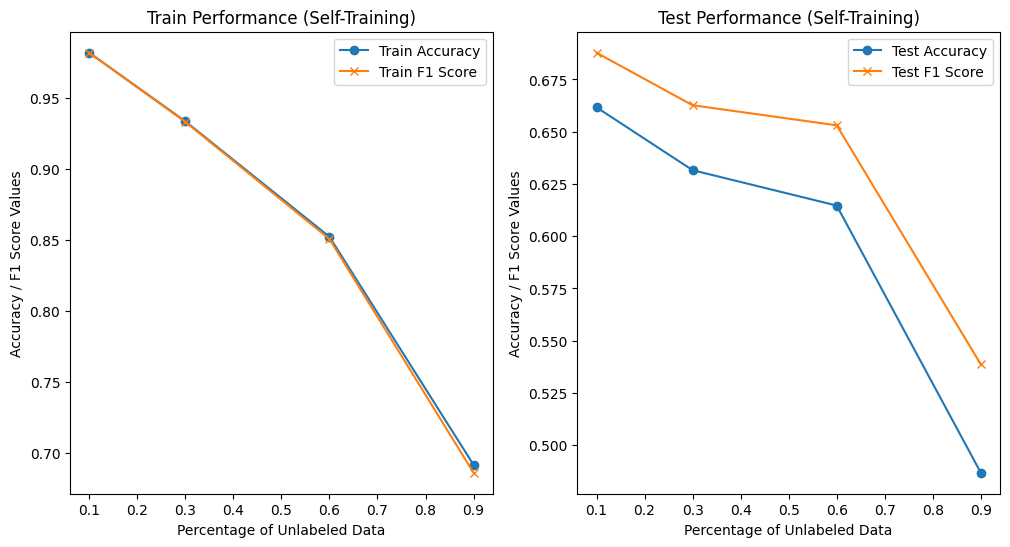

In [43]:
print("************** SELF-TRAINING MODEL **************")
print("************** FOR UNBALANCED DATA **************")

accuracies_train = []
f1_scores_train = []
accuracies_test = []
f1_scores_test = []

for prop in proportions:

    print("\n***** ",prop*100, "% of data is unlabled *****")

    X_train_labeled, y_train_labeled, X_train_unlabeled, y_train_unlabeled = select_random_samples(X_train, y_train, prop, balanced=False)

    model = RandomForestClassifier()

    train_accuracy, train_f1, test_accuracy, test_f1 = self_training(X_train_labeled, y_train_labeled, X_train_unlabeled, X_test, y_test, model, confidence_threshold=0.9, max_iterations=10)

    # Store results
    accuracies_train.append(train_accuracy)
    f1_scores_train.append(train_f1)
    accuracies_test.append(test_accuracy)
    f1_scores_test.append(test_f1)


# Plotting the results
plt.figure(figsize=(12, 6))

# Plot for Training Data
plt.subplot(1, 2, 1)
plt.plot(proportions, accuracies_train, label='Train Accuracy', marker='o')
plt.plot(proportions, f1_scores_train, label='Train F1 Score', marker='x')
plt.title('Train Performance (Self-Training)')
plt.xlabel('Percentage of Unlabeled Data')
plt.ylabel('Accuracy / F1 Score Values')
plt.legend()

# Plot for Testing Data
plt.subplot(1, 2, 2)
plt.plot(proportions, accuracies_test, label='Test Accuracy', marker='o')
plt.plot(proportions, f1_scores_test, label='Test F1 Score', marker='x')
plt.title('Test Performance (Self-Training)')
plt.xlabel('Percentage of Unlabeled Data')
plt.ylabel('Accuracy / F1 Score Values')
plt.legend()


# S3VM

In [44]:
from qns3vm.qns3vm.qns3vm import *
import warnings

warnings.simplefilter('error')
warnings.filterwarnings('ignore', category=PendingDeprecationWarning) 
warnings.filterwarnings("ignore", category=DeprecationWarning, message=".*scipy.sparse.csc.*") 


from sklearn import svm

In [45]:
import random, time
my_random_generator = random.Random()
my_random_generator.seed(0)

In [46]:
# Number of repetitions for average result
reps = 10

**************      S3VM MODEL     **************
**************  FOR BALANCED DATA  **************

*****  90.0 % of data is unlabled *****
ACC [0.41992481203007526]
F1 [0.5909499344489026]

*****  60.0 % of data is unlabled *****
ACC [0.41992481203007526, 0.4207706766917293]
F1 [0.5909499344489026, 0.5921462781739038]

*****  30.0 % of data is unlabled *****
ACC [0.41992481203007526, 0.4207706766917293, 0.4250939849624061]
F1 [0.5909499344489026, 0.5921462781739038, 0.5965577943747382]

*****  10.0 % of data is unlabled *****
ACC [0.41992481203007526, 0.4207706766917293, 0.4250939849624061, 0.4323308270676692]
F1 [0.5909499344489026, 0.5921462781739038, 0.5965577943747382, 0.6036650409236067]


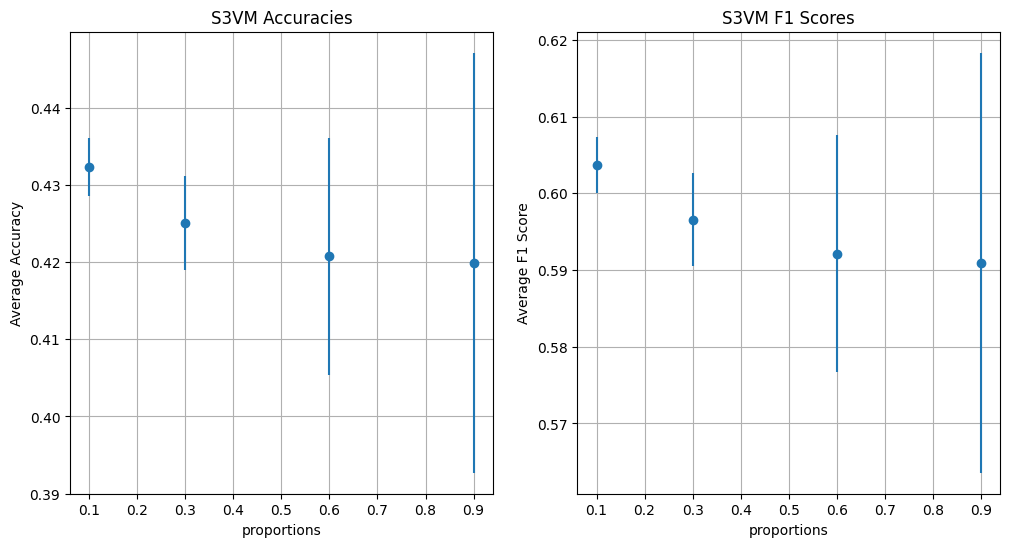

In [47]:
print("**************      S3VM MODEL     **************")
print("**************  FOR BALANCED DATA  **************")

acc_mean_s3vm = []
acc_std_s3vm = []
f1_mean_s3vm = []
f1_std_s3vm = []

for prop in proportions:
  accuracies_svm = []
  f1scores_svm = []
  accuracies_s3vm = []
  f1scores_s3vm = []

  for rep in range(reps):

    X_train_labeled, y_train_labeled, X_train_unlabeled, y_train_unlabeled = select_random_samples(X_train, y_train, prop, balanced=True)

    # SVM training and accuracy on labeled data
    clf = svm.SVC(kernel='linear', C=1)
    clf.fit(X_train_labeled, y_train_labeled.ravel())
    y_pred = clf.predict(X_test)
    acc_svm = accuracy_score(y_test, y_pred)
    accuracies_svm.append(acc_svm)
    f1_svm = f1_score(y_test, y_pred, average='weighted')
    f1scores_svm.append(f1_svm)

    # S3VM training and accuracy on labeled + unlabeled data
    model = QN_S3VM(X_train_labeled.tolist(), y_train_labeled.ravel(), X_train_unlabeled.tolist(), my_random_generator)
    model.train()
    preds = model.getPredictions(X_test)
    acc_s3vm = accuracy_score(preds, y_pred)
    f1_s3vm = f1_score(preds, y_pred, average='weighted')
    accuracies_s3vm.append(acc_s3vm)
    f1scores_s3vm.append(f1_s3vm)
  
  print("\n***** ",prop*100, "% of data is unlabled *****")
  acc_mean_s3vm.append(np.mean(accuracies_s3vm))
  acc_std_s3vm.append(np.std(accuracies_s3vm))
  f1_mean_s3vm.append(np.mean(f1scores_s3vm))
  f1_std_s3vm.append(np.std(f1scores_s3vm))
  print("ACC",acc_mean_s3vm)
  print("F1", f1_mean_s3vm)


# Plotting the results
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.errorbar(proportions, acc_mean_s3vm, yerr=acc_std_s3vm, fmt='o')
plt.xlabel('proportions')
plt.ylabel('Average Accuracy')
plt.title('S3VM Accuracies')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.errorbar(proportions, f1_mean_s3vm, yerr=f1_std_s3vm, fmt='o')
plt.xlabel('proportions')
plt.ylabel('Average F1 Score')
plt.title('S3VM F1 Scores')
plt.grid(True)

**************       S3VM MODEL      **************
**************  FOR UNBALANCED DATA  **************

*****  90.0 % of data is unlabled *****
ACC [0.4336466165413534]
F1 [0.6026878889471411]

*****  60.0 % of data is unlabled *****
ACC [0.4336466165413534, 0.43984962406015027]
F1 [0.6026878889471411, 0.6108055927159132]

*****  30.0 % of data is unlabled *****
ACC [0.4336466165413534, 0.43984962406015027, 0.43609022556390975]
F1 [0.6026878889471411, 0.6108055927159132, 0.607247500821189]

*****  10.0 % of data is unlabled *****
ACC [0.4336466165413534, 0.43984962406015027, 0.43609022556390975, 0.4333646616541354]
F1 [0.6026878889471411, 0.6108055927159132, 0.607247500821189, 0.6046633895628422]


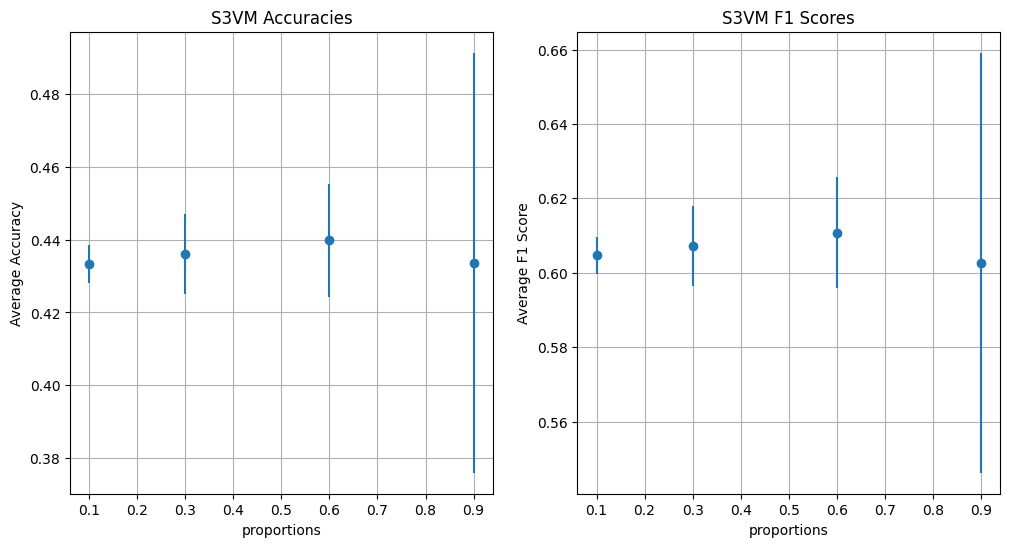

In [48]:
print("**************       S3VM MODEL      **************")
print("**************  FOR UNBALANCED DATA  **************")

acc_mean_s3vm = []
acc_std_s3vm = []
f1_mean_s3vm = []
f1_std_s3vm = []

for prop in proportions:
  accuracies_svm = []
  f1scores_svm = []
  accuracies_s3vm = []
  f1scores_s3vm = []

  for rep in range(reps):

    X_train_labeled, y_train_labeled, X_train_unlabeled, y_train_unlabeled = select_random_samples(X_train, y_train, prop, balanced=False)

    # SVM training and accuracy on labeled data
    clf = svm.SVC(kernel='linear', C=1)
    clf.fit(X_train_labeled, y_train_labeled.ravel())
    y_pred = clf.predict(X_test)
    acc_svm = accuracy_score(y_test, y_pred)
    accuracies_svm.append(acc_svm)
    f1_svm = f1_score(y_test, y_pred, average='weighted')
    f1scores_svm.append(f1_svm)

    # S3VM training and accuracy on labeled + unlabeled data
    model = QN_S3VM(X_train_labeled.tolist(), y_train_labeled.ravel(), X_train_unlabeled.tolist(), my_random_generator)
    model.train()
    preds = model.getPredictions(X_test)
    acc_s3vm = accuracy_score(preds, y_pred)
    f1_s3vm = f1_score(preds, y_pred, average='weighted')
    accuracies_s3vm.append(acc_s3vm)
    f1scores_s3vm.append(f1_s3vm)
  
  print("\n***** ",prop*100, "% of data is unlabled *****")
  acc_mean_s3vm.append(np.mean(accuracies_s3vm))
  acc_std_s3vm.append(np.std(accuracies_s3vm))
  f1_mean_s3vm.append(np.mean(f1scores_s3vm))
  f1_std_s3vm.append(np.std(f1scores_s3vm))
  print("ACC",acc_mean_s3vm)
  print("F1", f1_mean_s3vm)


# Plotting the results
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.errorbar(proportions, acc_mean_s3vm, yerr=acc_std_s3vm, fmt='o')
plt.xlabel('proportions')
plt.ylabel('Average Accuracy')
plt.title('S3VM Accuracies')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.errorbar(proportions, f1_mean_s3vm, yerr=f1_std_s3vm, fmt='o')
plt.xlabel('proportions')
plt.ylabel('Average F1 Score')
plt.title('S3VM F1 Scores')
plt.grid(True)